# Convolutions

## Convolutions in NumPy

The code below implements a basic *concolution* operation using NumPy arrays; these are the same arrays used in this week's lecture. It uses an input array of 6x6 and a filter of 3x3. Note that the `*` below does elementwise multiplication between two arrays. The example below shows how elementwise matrix multiplication works. (Note: if the arrays do not have the same shape, broadcasting will be done, if possible.)

In [1]:
import numpy as np

arr1 = np.array([[1, 2, 3], 
               [4, 5, 6]])

arr2 = np.array([[1, 2, 3], 
               [4, 5, 6]])

arr1 * arr2  # we could also use np.multiply(arr1, arr2)

array([[ 1,  4,  9],
       [16, 25, 36]])

Execute the code below and make sure you understand the results. Verify a few elements by doing the calculation by hand.  

In [2]:
x = np.array([[6, 1, 7, 3, 6, 7],
             [3, 2, 2, 8, 6, 1],
             [8, 5, 3, 0, 1, 8],
             [8, 7, 8, 3, 4, 8],
             [5, 4, 7, 3, 6, 4],
             [7, 3, 2, 5, 5, 2]])

x

array([[6, 1, 7, 3, 6, 7],
       [3, 2, 2, 8, 6, 1],
       [8, 5, 3, 0, 1, 8],
       [8, 7, 8, 3, 4, 8],
       [5, 4, 7, 3, 6, 4],
       [7, 3, 2, 5, 5, 2]])

In [3]:
f = np.array([[0, 3, 0], 
              [-1, 1, 2], 
              [4, 0, 1]])
f

array([[ 0,  3,  0],
       [-1,  1,  2],
       [ 4,  0,  1]])

In [4]:
v = np.zeros((4, 4))
v

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

For each line of code below, locate which element of `v` is being updated and which section of the `x` array is involved (use the output for `v` and `x` above for this). Make sure this makes sense based on your understanding of the lecture material. 

In [5]:
v[0,0] = np.sum(x[0:3, 0:3] * f)
v[0,1] = np.sum(x[0:3, 1:4] * f)
v[0,2] = np.sum(x[0:3, 2:5] * f)
v[0,3] = np.sum(x[0:3, 3:6] * f)

v[1,0] = np.sum(x[1:4, 0:3] * f)
v[1,1] = np.sum(x[1:4, 1:4] * f)
v[1,2] = np.sum(x[1:4, 2:5] * f)
v[1,3] = np.sum(x[1:4, 3:6] * f)

v[2,0] = np.sum(x[2:5, 0:3] * f)
v[2,1] = np.sum(x[2:5, 1:4] * f)
v[2,2] = np.sum(x[2:5, 2:5] * f)
v[2,3] = np.sum(x[2:5, 3:6] * f)

v[3,0] = np.sum(x[3:6, 0:3] * f)
v[3,1] = np.sum(x[3:6, 1:4] * f)
v[3,2] = np.sum(x[3:6, 2:5] * f)
v[3,3] = np.sum(x[3:6, 3:6] * f)

In [6]:
v

array([[41., 57., 40., 26.],
       [49., 35., 59., 55.],
       [57., 35., 37., 36.],
       [64., 50., 30., 45.]])

### Exercise

Keep the same array `x` but change `f` so it is a 5x5 filter to produce a new output `v2`. Double check the output by doing a few calculations by hand.  

## Convolutions in Keras

The code below will allow you to play with a single convolutional layer in Keras. Take a look at the documentation for the [Conv2D](https://keras.io/api/layers/convolution_layers/convolution2d/) layer, which is also where the original code came from. 

In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D

In [8]:
input_shape = (4, 28, 28, 3)

x = tf.random.normal(input_shape)

y = Conv2D(filters=2, 
           kernel_size=(3, 3), 
           strides=1, 
           padding='valid', 
           input_shape=input_shape[1:])(x)

y.shape

TensorShape([4, 26, 26, 2])

Here is a brief explanation of the above code: 

<img src="Convolution_notebook-2.jpg" width=600 align="center">

### Exercises

In the code above, make changes to:
- input $h$
- input $w$
- input $n_c$
- number of filters
- kernel size (same as filter size)
- type of padding used
- stride value

For each change, calculate the dimensions of the output (`y.shape`) by hand, including drawing a diagram (as shown below). 

<img src="Convolution_notebook-1.jpg" width=600 align="center">

## MNIST Revisited

Let's now revisit our MNIST. Knowing that the data contains 2-dimensional images of handwritten digits, we should be able to apply what we've learned about convolutions. Thus, in this section, we will create a convolutional neural network (CNN or convnet) for this data set.

In [9]:
from tensorflow.keras.datasets import mnist
import numpy as np # included here for completeness

(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

This time we are going to use a *validation set* to monitor our training progress. We can also use this validation set for *hyperparameter tuning*. Remember, using the validation set allows us to keep the *test set* to gauge how well our final model should do in the real world; that is, the final model only sees the test data once.

In [10]:
# Use the first 10,000 samples of our training data as our validation set
val_data = train_data[:10000]
val_labels = train_labels[:10000]

# Use the remainder of the original training data for actual training
partial_train_data = train_data[10000:]
partial_train_labels = train_labels[10000:]

In [11]:
# Scale the pixel values so they lie in the range of 0-1
partial_train_data = partial_train_data / 255.
val_data = val_data / 255.
test_data = test_data /255.

Note that our data currently has 3 dimensions: `(samples, height, width)`. 

In [12]:
print(partial_train_data.shape)
print(val_data.shape)
print(test_data.shape)

(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


Our convolutional neural network will expect 4-dimensional data: `(batch_size, height, width, channels)`. Note that depending on how you decide to update the parameters of the network, `batch_size` could equal the number of `samples` (as in *batch gradient descent*), or it could equal a single sample (as in *stochastic gradient descent*, or it can equal the batch size (as in *mini-batch gradient descent*). 

We can use a NumPy function to add this dimension. 

In [13]:
partial_train_data = np.expand_dims(partial_train_data, axis=3)
val_data = np.expand_dims(val_data, axis=3)
test_data = np.expand_dims(test_data, axis=3)

In [14]:
print(partial_train_data.shape)
print(val_data.shape)
print(test_data.shape)

(50000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)


Note how a fourth dimension was added to our data. This dimension corresponds to the number of channels in our input data. Here it is 1, since the images are all greyscale. It would be 3 if the images were RGB. Also note, that the convention here is *channels last*, as opposed to *channels first*.

As in Lab 1, we need to convert our label data to the correct format. 

In [15]:
from tensorflow.keras.utils import to_categorical

partial_train_labels = to_categorical(partial_train_labels)
val_labels = to_categorical(val_labels)
test_labels = to_categorical(test_labels)

We will now import the necessary modules for building our convolutional neural network. Since we are using Keras's sequential API we need to import the `Sequential` module. The remaining 3 imports will help us build the layers of our CNN. `Conv2D` creates the convolutional layers we have been discussing in the lectures. `Flatten` is used to create a 1 dimensional vector so we can feed the output of our convolutional layers to the fully-connected layers. We used NumPy's `reshape` function to do this flattening in Lab 1. And the `Dense` layer is the same as what we used in Lab 1. 

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense

We are going to use a slightly different approach to building our network than we did in Lab 1. Here we will directly add a *list of layers* to the `Sequential()` object. That is, we put all our layers inside square brackets `[...]` and put this inside the `Sequential( [...] )` object to create our model. In Lab 1 we used the `.add()` method to add individual layers to our `Sequential()` object that we initialized without any layers. 

In [25]:
model = Sequential([
    Conv2D(filters=32, 
           kernel_size=(3, 3), 
           strides=1, 
           padding='same', 
           activation='relu',
           input_shape=(28, 28, 1)),
    Conv2D(filters=32, 
           kernel_size=(3, 3), 
           strides=2, 
           padding='valid',
           activation='relu'),
    Conv2D(filters=64, 
           kernel_size=(3, 3), 
           strides=1, 
           padding='same', 
          activation='relu'),
    Conv2D(filters=64, 
           kernel_size=(3, 3), 
           strides=2, 
           padding='valid',
           activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

It is often helpful to see the tensor shapes and number of parameters per layer. We can get this information by using the `.summary()` method. 

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 6, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               295040    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

We are still tackling the same type of problem (multi-class classification) so the same loss and metrics will work for us here. The optimizer `rmsprop` is the same as we used before and can be taken as the default method (or recipe) to try out for updating the model parameters.

In [19]:
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

We now fit our model to the remaining training data (the original training data minus the validation data). You will now see that *loss* and *accuracy* get updated for each batch of images (here set to 256) but the *validation loss* and *validation accuracy* get updated after each *epoch*. Note that the *validation data* is not being used to train the model. Each batch of the training data is used to update the parameters and then, once we have gone through all of the samples in our training data (that is, all the samples in `partial_train_data`) the model is used to make predictions for the validation set. From those predictions the validation loss and accuracy are calculated. 

Each epoch of training should take 30-50s to complete. 

In [20]:
history = model.fit(partial_train_data, 
                    partial_train_labels, 
                    epochs=10, 
                    batch_size=256, 
                    validation_data=(val_data, val_labels),
                    verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 62s 1ms/sample - loss: 0.2788 - accuracy: 0.9139 - val_loss: 0.1045 - val_accuracy: 0.9683
Epoch 2/10
50000/50000 [==============================] - 61s 1ms/sample - loss: 0.0604 - accuracy: 0.9813 - val_loss: 0.0619 - val_accuracy: 0.9821
Epoch 3/10
50000/50000 [==============================] - 61s 1ms/sample - loss: 0.0369 - accuracy: 0.9887 - val_loss: 0.0602 - val_accuracy: 0.9812
Epoch 4/10
50000/50000 [==============================] - 60s 1ms/sample - loss: 0.0259 - accuracy: 0.9918 - val_loss: 0.0480 - val_accuracy: 0.9883
Epoch 5/10
50000/50000 [==============================] - 61s 1ms/sample - loss: 0.0191 - accuracy: 0.9941 - val_loss: 0.0435 - val_accuracy: 0.9890
Epoch 6/10
50000/50000 [==============================] - 62s 1ms/sample - loss: 0.0151 - accuracy: 0.9955 - val_loss: 0.0445 - val_accuracy: 0.9876
Epoch 7/10
50000/50000 [==============================] 

The values for the training loss and accuracy, as well as the validation loss and accuracy, are stored in the `history` variable. You can see the structure of the dictionary that stores this information as follows:

In [21]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

We will now use this information to visualize the progress our network makes on the loss and accuracy as the number of epochs increases. 

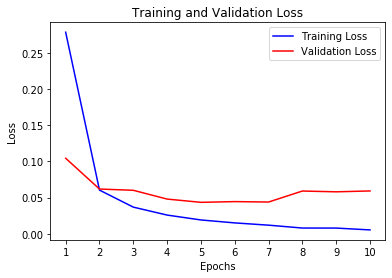

In [22]:
import matplotlib.pyplot as plt  # needed to create our plot

history_dict = history.history # the dictionary that has the information on loss and accuracy per epoch

loss_values = history_dict['loss']   # training loss
val_loss_values = history_dict['val_loss'] # validation loss

epochs = range(1, len(loss_values)+1)  #creates list of integers to match the number of epochs of training

# code to plot the results
plt.plot(epochs, loss_values, 'b', label="Training Loss")
plt.plot(epochs, val_loss_values, 'r', label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.show()

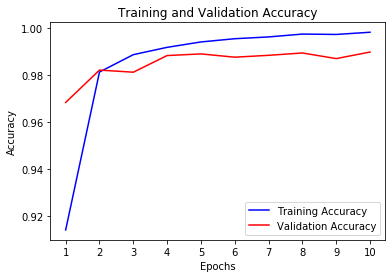

In [23]:
# As above, but this time we want to visualize the training and validation accuracy
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'b', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Exercise: Parameters

For the model we have created, calculate the number of parameters by hand for each layer and compare to the output of `model.summary()`. For Exercise 7 in Lab 1, how many parameters did your model have?

## Exercise: Early Stopping

When I ran this model the validation loss stopped decreasing after 4 epochs. This is where the model seems to stop learning and is starting to just memorize the training data. I could also see this in the since the accuracy on the validation set did not change much after 4 epochs. 

One way to avoid this overfitting is called *early stopping*. In my case, this means I would stop training the network after 4 epochs. Note how I have used the validation set to determine when to stop training! 

Try implementing early stopping for our model:
- use the validation loss plot to determine which epoch corresponds to when the model stops learning 
    - if it so happens that the validation loss continues going down for all 10 epochs, then increase the number of epochs in the original code to 20
- use the complete training set (no validation set)
- scale this training set
- expand its dimensions to 4 (this 4 is not connected in any way to stopping training after 4 epochs)
- use the same model, and same optimizer, loss and metrics
- fit the model to the complete training set (no validation set)
- plot the training and validation lossess and accuracies per epoch
- evaluate the trained model on the test data


## Exercise: Change the layers

Play around with the **number of filters** and the **filter size** in our model. Note the change in:
- number of parameters in the model
- training and validation losses and accuracies